In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
# 1. 데이터 로드 및 전처리 (MLP와 동일)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


(891, 7, 1)
Epoch 1: Loss=0.6286, Acc=0.677
Epoch 10: Loss=0.4159, Acc=0.831
Epoch 20: Loss=0.4023, Acc=0.830
Epoch 30: Loss=0.3743, Acc=0.837


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: 

Epoch 40: Loss=0.3770, Acc=0.844
Epoch 50: Loss=0.3547, Acc=0.855


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


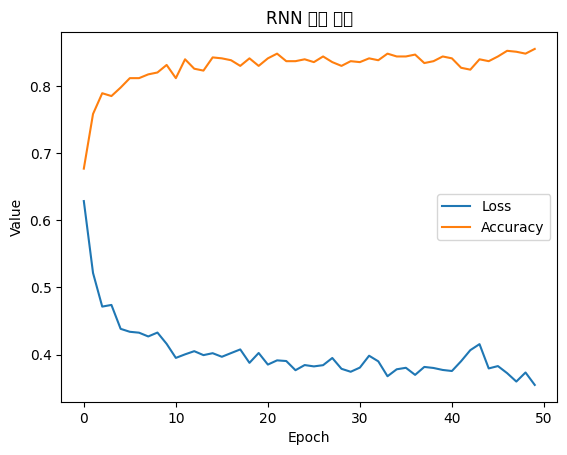

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

테스트셋 정확도: 0.844
              precision    recall  f1-score   support

           0      0.824     0.933     0.875       105
           1      0.883     0.716     0.791        74

    accuracy                          0.844       179
   macro avg      0.853     0.825     0.833       179
weighted avg      0.848     0.844     0.840       179



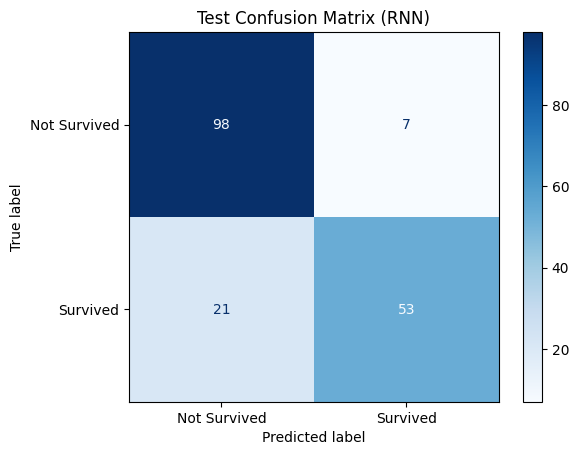

In [4]:


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_col = 'Survived'
df = df[cols + [target_col]]

# 결측치 처리
for col in ['Age', 'Fare']:
    df[col] = df[col].fillna(df[col].mean())
for col in ['Sex', 'Embarked']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 범주형 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# 입력/정규화
X = df[cols].values.astype(np.float32)
y = df[target_col].values.astype(np.int64)
scaler = StandardScaler()
num_idx = [0,2,3,4,5]
X[:,num_idx] = scaler.fit_transform(X[:,num_idx])

# --- 핵심: RNN 입력을 (샘플수, 시퀀스길이, 1) 형태로 변경 ---
# (각 승객: 7개 feature → 7단계 시퀀스, 각 단계는 scalar 1개)
X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
print(X_rnn.shape)
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)

# PyTorch Dataset
class TitanicSeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TitanicSeqDataset(X_train, y_train)
test_ds = TitanicSeqDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

# 2. RNN 모델 정의 (간단 RNN/LSTM)
class TitanicRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, num_layers=1, num_classes=2):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 8),
            nn.ReLU(),
            nn.Linear(8, num_classes)
        )
    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:,-1,:]  # 마지막 시퀀스의 hidden state만 사용
        out = self.fc(out)
        return out

model = TitanicRNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# 3. 학습
losses, accs = [], []
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (torch.argmax(pred,1)==yb).sum().item()
        total += yb.size(0)
    acc = correct/total
    losses.append(total_loss/len(train_loader))
    accs.append(acc)
    if (epoch+1)%10==0 or epoch==0:
        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}, Acc={acc:.3f}")

plt.plot(losses, label="Loss")
plt.plot(accs, label="Accuracy")
plt.title("RNN 학습 곡선")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

# 4. 테스트셋 평가
model.eval()
with torch.no_grad():
    all_pred = []
    all_true = []
    for xb, yb in test_loader:
        pred = model(xb)
        pred_label = torch.argmax(pred,1)
        all_pred.extend(pred_label.cpu().numpy())
        all_true.extend(yb.cpu().numpy())
    all_pred = np.array(all_pred)
    all_true = np.array(all_true)
    test_acc = (all_pred==all_true).mean()
    print(f"테스트셋 정확도: {test_acc:.3f}")

# 5. confusion matrix, classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(all_true, all_pred, digits=3))
cm = confusion_matrix(all_true, all_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Survived","Survived"]).plot(cmap='Blues')
plt.title("Test Confusion Matrix (RNN)")
plt.show()
